In [72]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
df = pd.read_csv("mbti_1.csv",index_col=False)
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [75]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [76]:
df['type'].value_counts()


INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

Text(0.5, 1.0, 'Total post each personality type')

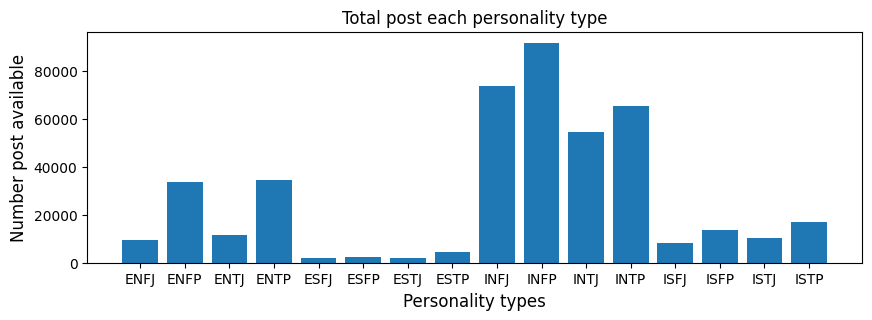

In [77]:
total = df.groupby(['type']).count()*50
plt.figure(figsize = (10,3))
plt.bar(np.array(total.index), height =total['posts'],)
plt.xlabel('Personality types', size = 12)
plt.ylabel('Number post available', size = 12)
plt.title('Total post each personality type')

In [78]:
from collections import Counter
words = list(df["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(10)

[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263)]

In [79]:
plt.figure(figsize=(20,20))
px.pie(df,names='type',title='Personality type',hole=0.2)

<Figure size 2000x2000 with 0 Axes>

In [80]:
df = df.copy()
#this function counts the no of words in each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#this function counts the no of words per post out of the total 50 posts in the whole row
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))

<Figure size 1500x1000 with 0 Axes>

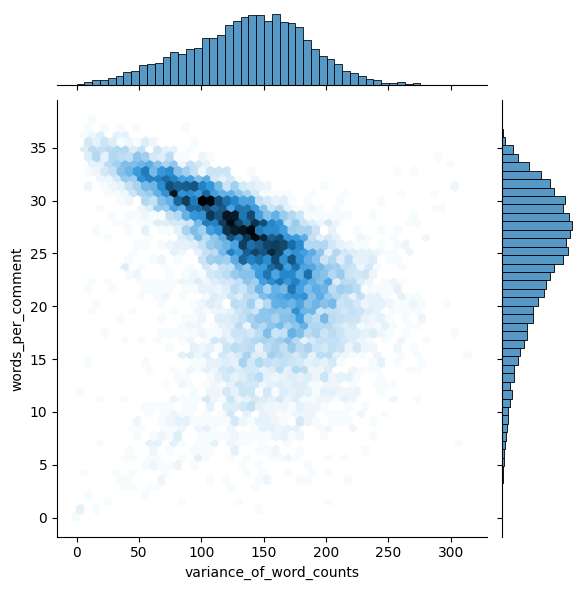

In [81]:
plt.figure(figsize=(15,10))
sns.jointplot(x=df["variance_of_word_counts"],y=df["words_per_comment"],kind="hex")


/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/3119686239.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/3119686239.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/3119686239.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/3119686239.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call 

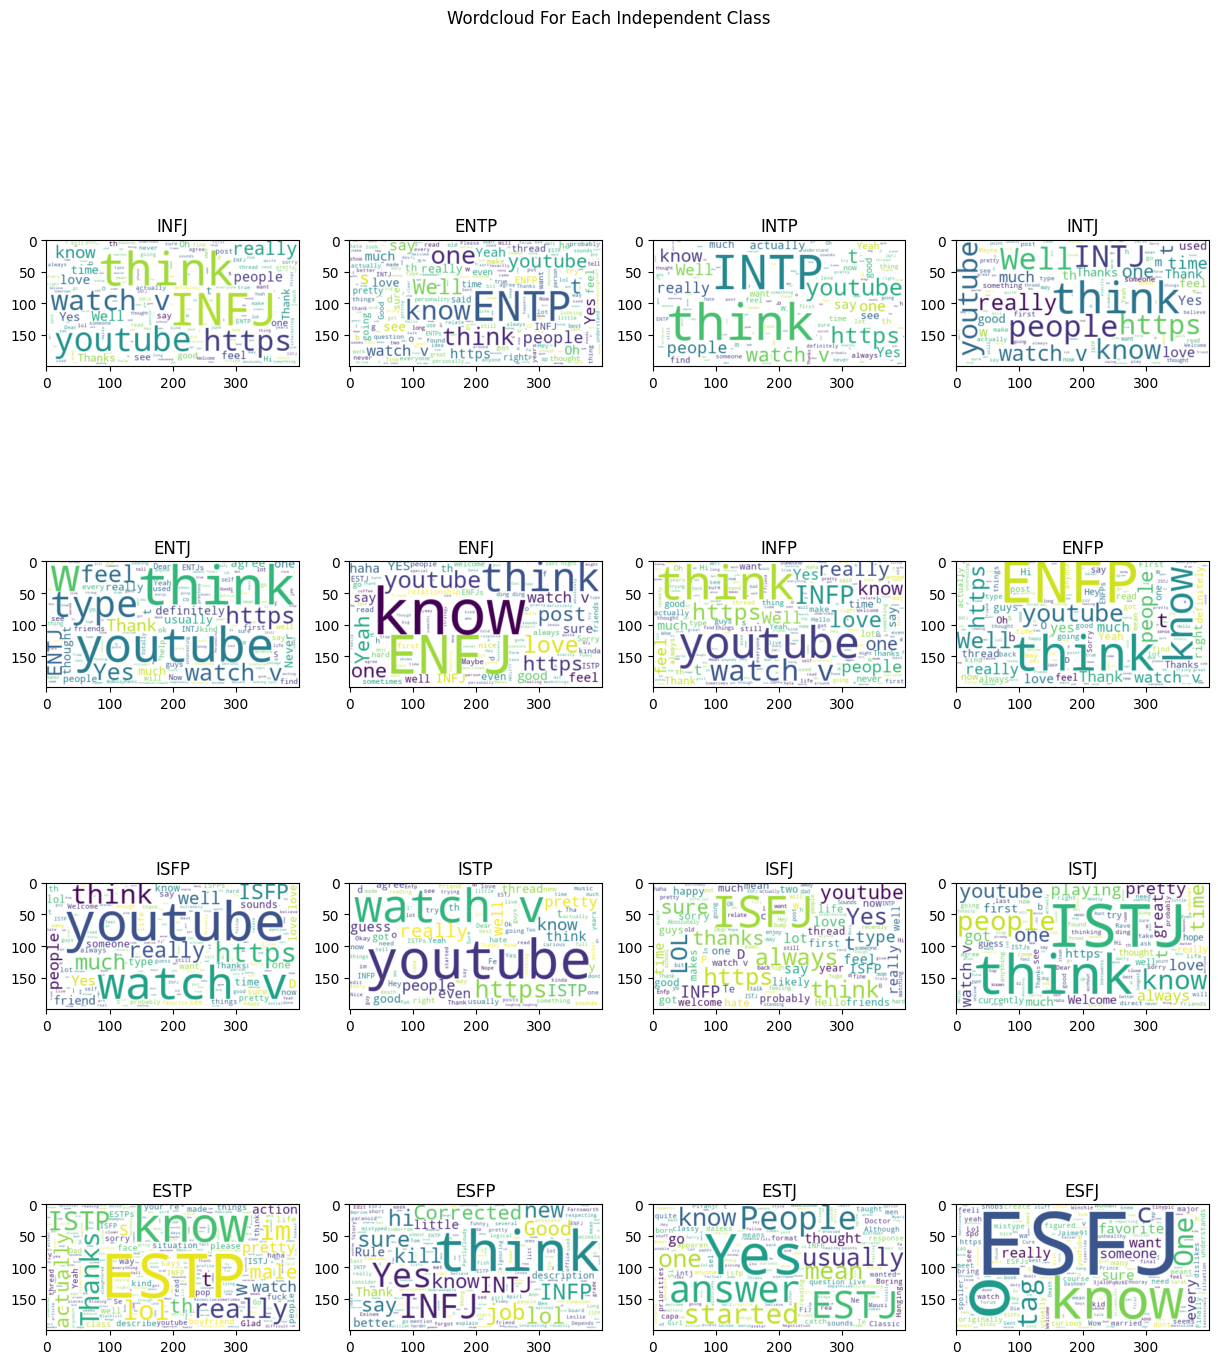

In [82]:
fig, ax = plt.subplots(len(df['type'].unique()), figsize=(15,len(df['type'].unique())))
plt.suptitle("Wordcloud For Each Independent Class")
k = 0

for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud(max_words=1628, relative_scaling=1, normalize_plurals=False, background_color='white').generate(df_4['posts'].to_string())

    plt.subplot(4, 4, k + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    
    ax[k].axis("off")
    k += 1

plt.show()

In [83]:
def clear_text(df):
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    stop_words = set(stopwords.words('english')) # Load stop words
    pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
    pers_types = [p.lower() for p in pers_types]
    
    print("Cleaning The Dataset")
    for sentence in tqdm(df.posts):
        
        sentence=sentence.lower()
        
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
        
        sentence=re.sub('[^0-9a-z]',' ',sentence)
        
        sentence = " ".join([word for word in sentence.split() if word not in stop_words]) # Remove stop words
        #print(len(sentence))
        
        for p in pers_types:
            sentence = re.sub(p, '', sentence)
        #print(len(sentence))
        
        sentence = lemmatizer.lemmatize(sentence) # Lemmatize words
        
        data_length.append(len(sentence.split())) #Split data, measure length of new filtered data
        
        cleaned_text.append(sentence)
        
    return cleaned_text,data_length

In [84]:
df_clean = df
df_clean.posts,df_clean_length=clear_text(df)
df_clean.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cleaning The Dataset


100%|██████████| 8675/8675 [00:04<00:00, 2128.73it/s]


,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,moments sportscenter top ten plays pranks lif...,11.12,135.2900
1,ENTP,finding lack posts alarming sex boring positio...,23.40,187.4756
2,INTP,good one course say know blessing curse absolu...,16.72,180.6900
3,INTJ,dear enjoyed conversation day esoteric gabbin...,21.28,181.8324
4,ENTJ,fired another silly misconception approaching ...,19.34,196.4576


/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/790804810.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/790804810.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/790804810.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/var/folders/gc/lcx_8cj930n5ryd40pj00flm0000gn/T/ipykernel_43016/790804810.py:7: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.r

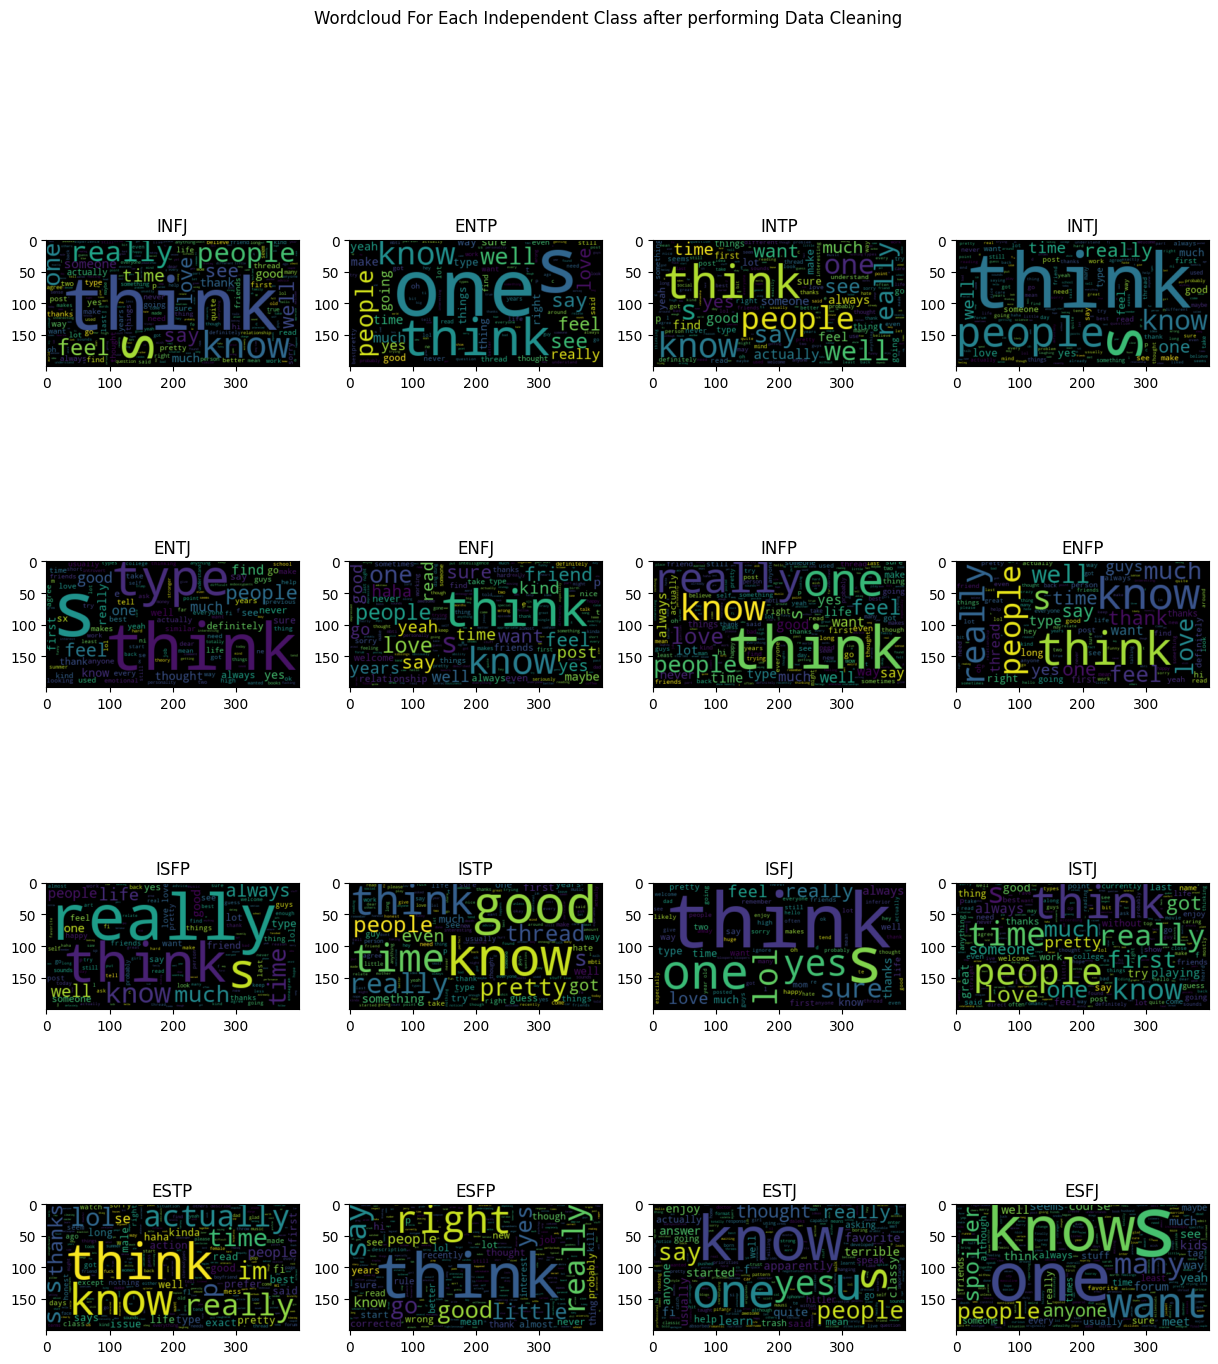

In [85]:
fig, ax = plt.subplots(len(df_clean['type'].unique()), figsize=(15,len(df_clean['type'].unique())))
plt.suptitle("Wordcloud For Each Independent Class after performing Data Cleaning")
k = 0
for i in df_clean['type'].unique():
    df_4 = df_clean[df_clean['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['posts'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [86]:
from collections import Counter
words = list(df_clean["posts"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(10)

[('like', 69675),
 ('think', 49837),
 ('people', 47855),
 ('one', 37167),
 ('know', 36937),
 ('really', 35291),
 ('would', 35015),
 ('get', 30804),
 ('time', 27610),
 ('feel', 23337)]

In [87]:
target_encoder=LabelEncoder()
target_encoder.fit(df.type)

LabelEncoder()

In [88]:
le_name_mapping = dict(zip(target_encoder.classes_, target_encoder.fit_transform(target_encoder.classes_)))
new_dict = dict([(value, key) for key, value in le_name_mapping.items()])
new_dict

{0: 'ENFJ',
 1: 'ENFP',
 2: 'ENTJ',
 3: 'ENTP',
 4: 'ESFJ',
 5: 'ESFP',
 6: 'ESTJ',
 7: 'ESTP',
 8: 'INFJ',
 9: 'INFP',
 10: 'INTJ',
 11: 'INTP',
 12: 'ISFJ',
 13: 'ISFP',
 14: 'ISTJ',
 15: 'ISTP'}

In [89]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

In [90]:
def split(df, size):
    
    # Cleaning The Data
    df.posts, length = clear_text(df)
    
    #Splitting into train & test
    print("Splitting into train & test")
    train_data,test_data=train_test_split(df,test_size=size,random_state=0,stratify=df.type)
    
    #Applying Tfidf Vectorization
    print("Applying Tfidf Vectorization")
    vectorizer=TfidfVectorizer(max_features=5000,stop_words='english',tokenizer=Lemmatizer())
    vectorizer.fit(train_data.posts)
    
    #Applying the vectorizer transform
    train_post=vectorizer.transform(train_data.posts).toarray()
    test_post=vectorizer.transform(test_data.posts).toarray()
    
    #Label Encoding the classes as 0,1,2,3......
    print("Label Encoding the classes")
    target_encoder= LabelEncoder()
    
    #Getting the final train and test
    print("Getting the final train and test")
    train_target=target_encoder.fit_transform(train_data.type)
    test_target=target_encoder.fit_transform(test_data.type)
    print(target_encoder.classes_)
    return train_post, test_post, train_target, test_target  

In [91]:
X_train2, X_test2, y_train2, y_test2 = split(df_clean, 0.2)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cleaning The Dataset


100%|██████████| 8675/8675 [00:02<00:00, 2979.22it/s]
/Users/prawallamshal/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/Users/prawallamshal/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



Splitting into train & test
Applying Tfidf Vectorization
Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [92]:
from joblib import Parallel, delayed
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def run_model(model_name, X_train, X_test, y_train, y_test, count):
    print(f"running {model_name}")
    
    # Initialize the model variable
    model = None
    
    if model_name == "KNN":
        model = KNeighborsClassifier()
    #elif model_name == "Logistic Regression":
     #   model = LogisticRegression(max_iter=3000, C=0.5, n_jobs=-1)
    #elif model_name == "Linear Support Vector Classifier":
     #   model = LinearSVC(C=0.1)
    #elif model_name == "Support Vector classifier":
    #    model = SVC()
    #elif model_name == "Multinomial Naive Bayes":
    #    model = MultinomialNB()
    #elif model_name == "Decision Tree classifier":
    #    model = DecisionTreeClassifier(max_depth=14)
    #elif model_name == "Random Forest Classifier":
    #    model = RandomForestClassifier(max_depth=10)
    #elif model_name == "Gaussian Naive Bayes":
    #    model = GaussianNB()
    #elif model_name == "Gradient Boosting":
     #   model = XGBClassifier()
    
    # Check if model is assigned before using it
    if model is not None:
        model.fit(X_train, y_train)

        accuracy = accuracy_score(y_test, model.predict(X_test))
        f1 = f1_score(y_test, model.predict(X_test), average='macro')
        report = classification_report(y_test, model.predict(X_test), zero_division=0)

        return model_name, accuracy, f1, report
    else:
        # Handle the case where the model is not assigned
        return model_name, 0, 0, "Model not found"

In [93]:
def model(X_train, X_test, y_train, y_test, count):
    models_to_run = ["KNN", "Logistic Regression", "Linear Support Vector Classifier", "Support Vector classifier",
                     "Multinomial Naive Bayes", "Decision Tree classifier", "Random Forest Classifier",
                     "Gaussian Naive Bayes", "Gradient Boosting"]
    
    results = Parallel(n_jobs=-1)(delayed(run_model)(model_name, X_train, X_test, y_train, y_test, count) for model_name in models_to_run)
    
    models_accuracy = {model_name: accuracy for model_name, accuracy, _, _ in results}
    f1_scores = {model_name: f1 for model_name, _, f1, _ in results}
    report = {model_name: rep for model_name, _, _, rep in results}
    
    accuracy_under = pd.DataFrame(models_accuracy.items(), columns=['Models', 'Test accuracy'])
    f1_under = pd.DataFrame(f1_scores.items(), columns=['Models', 'Test F1 Score'])
    
    return accuracy_under, report, f1_under

In [94]:
target_names_orig = 16
model_accuracy_orig2, report_orig2, f1_orig2 = model(X_train2, X_test2, y_train2, y_test2, target_names_orig)
model_accuracy_orig2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

running KNN
running Linear Support Vector Classifier
running Logistic Regression
running Decision Tree classifier
running Multinomial Naive Bayes
running Gaussian Naive Bayes
running Gradient Boosting
running Support Vector classifier
running Random Forest Classifier


,Models,Test accuracy
0,KNN,0.212104
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [95]:
f1_orig2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,KNN,0.082536
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [96]:
##70 30 split

In [97]:
X_train3, X_test3, y_train3, y_test3 = split(df_clean, 0.3)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cleaning The Dataset


100%|██████████| 8675/8675 [00:02<00:00, 3761.85it/s]
/Users/prawallamshal/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/Users/prawallamshal/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



Splitting into train & test
Applying Tfidf Vectorization
Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']


In [98]:
model_accuracy_orig3, report_orig3, f1_orig3 = model(X_train3, X_test3, y_train3, y_test3, target_names_orig)

model_accuracy_orig3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

running Logistic Regression
running KNN
running Linear Support Vector Classifier
running Decision Tree classifier
running Multinomial Naive Bayes
running Support Vector classifier
running Gradient Boosting
running Gaussian Naive Bayes
running Random Forest Classifier


,Models,Test accuracy
0,KNN,0.216673
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [99]:
f1_orig3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,KNN,0.076367
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


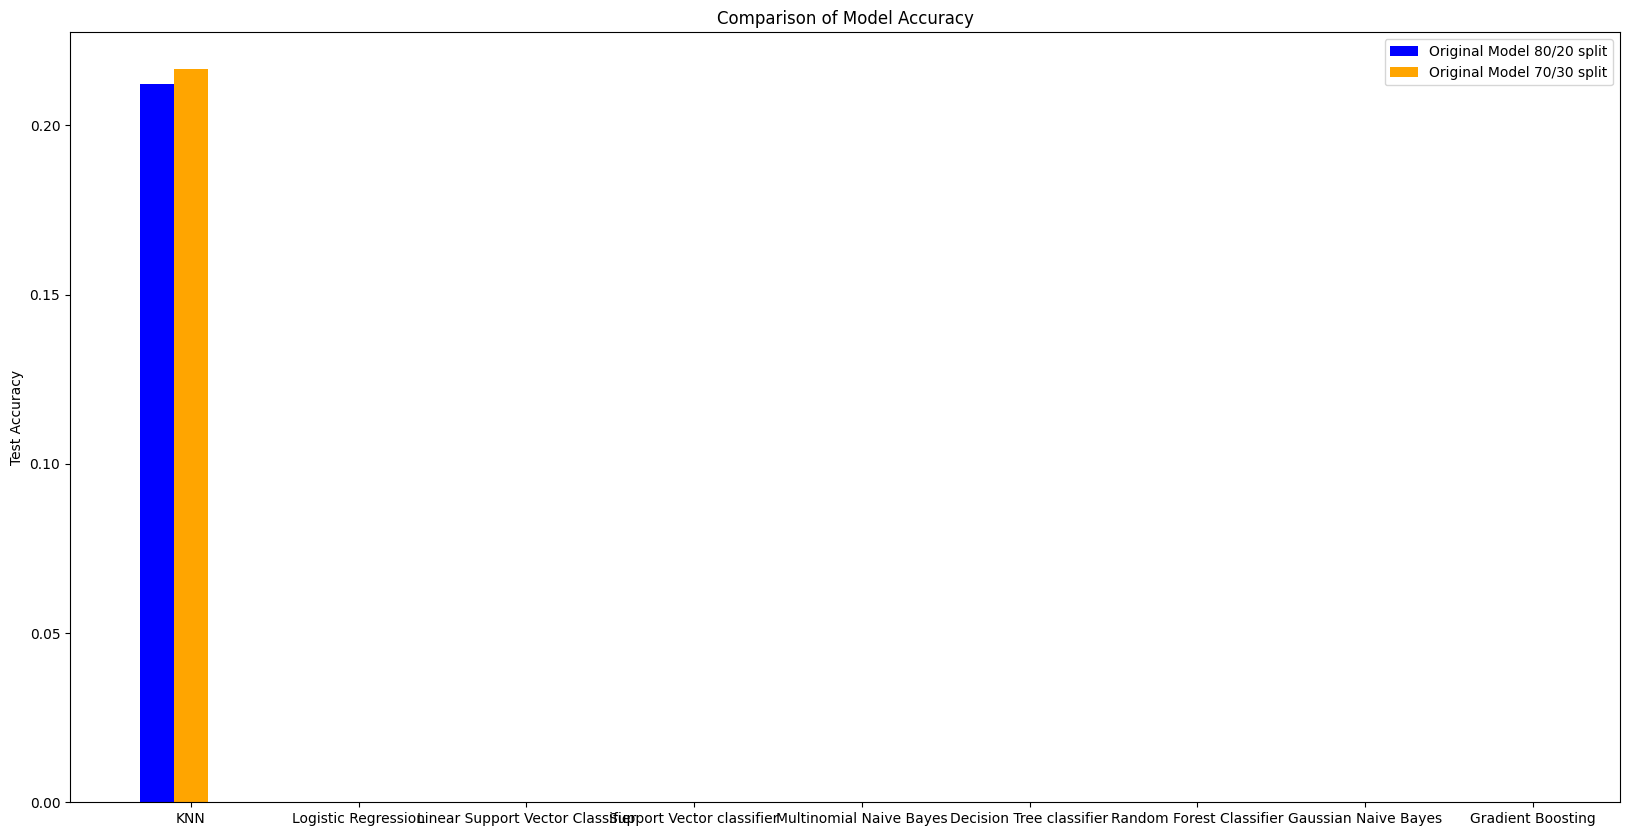

In [100]:
fig, ax = plt.subplots(figsize=(20, 10))
# Set width of each bar
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_orig2['Test accuracy'], color='blue', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_orig3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(model_accuracy_orig2['Models']))], model_accuracy_orig2['Models'])

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy')

# Add legend
plt.legend()

# Show plot
plt.show()

In [101]:
train_data2 = pd.DataFrame({'posts': list(X_train2), 'type': list(y_train2)}, index=None)
train_data2

,posts,type
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
...,...,...
6935,"[0.0, 0.03978110605893184, 0.0, 0.0, 0.0, 0.0,...",11
6936,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10
6937,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
6938,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9


In [102]:
train_data3 = pd.DataFrame({'posts': list(X_train3), 'type': list(y_train3)}, index=None)
train_data3

,posts,type
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",8
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
4,"[0.05392913172173782, 0.0, 0.0, 0.0, 0.0, 0.0,...",10
...,...,...
6067,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
6068,"[0.0, 0.0, 0.0, 0.05118042305110309, 0.0, 0.0,...",11
6069,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
6070,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10


In [103]:
print("For 80/20 split:")
train_data2.type.value_counts() 

For 80/20 split:


9     1466
8     1176
11    1043
10     873
3      548
1      540
15     270
13     217
2      185
14     164
0      152
12     133
7       71
5       38
4       33
6       31
Name: type, dtype: int64

In [104]:
print("For 70/30 Split: ")
train_data3.type.value_counts()

For 70/30 Split: 


9     1282
8     1029
11     913
10     764
3      479
1      472
15     236
13     190
2      162
14     144
0      133
12     116
7       62
5       34
4       29
6       27
Name: type, dtype: int64

In [105]:
def sampling(mode, df, col_name, class_names, count):
    dfs = []
    for class_name in class_names:
        if mode == 'under':
            df_class = df[df[col_name] == class_name]
            if len(df_class) > count:
                df_class = df_class.sample(count, replace=False)
            dfs.append(df_class)
        elif mode == 'over':
            df_class = df[df[col_name] == class_name]
            if len(df_class) < count:
                df_class = df_class.sample(count, replace=True)
            dfs.append(df_class)
    dfs = pd.concat(dfs)
    df_x = df[~df[col_name].isin(class_names)]
    return pd.concat([dfs,df_x])

In [106]:
train_data_under2= sampling('under', train_data2, 'type', [9,8,11,10,], 600)
train_data_under2 #undersampling

,posts,type
523,"[0.0, 0.03059441995933068, 0.0, 0.0, 0.0, 0.0,...",9
5852,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
2457,"[0.0, 0.03286415434657481, 0.0, 0.0, 0.0, 0.0,...",9
760,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0613397519164...",9
4841,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
...,...,...
6926,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.057737741953966804...",15
6927,"[0.0, 0.036736062409850403, 0.0, 0.0, 0.0, 0.0...",3
6930,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
6931,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3


In [107]:
train_data_under3 = sampling('under', train_data3, 'type', [9,8,11,10,], 500)
train_data_under3

,posts,type
4487,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
2046,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
3467,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
4962,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9
2841,"[0.0, 0.030964880882861652, 0.0, 0.0, 0.0, 0.0...",9
...,...,...
6060,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
6062,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",14
6063,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
6064,"[0.0, 0.020335363110752184, 0.0, 0.0, 0.277836...",3


In [108]:
def get_train(train_data):
    
    X_train = np.vstack(np.array(train_data.posts))
    y_train = np.array(train_data.type)
    
    return X_train, y_train

In [109]:
X_train_under2, y_train_under2 = get_train(train_data_under2)

In [110]:
X_train_under3, y_train_under3 = get_train(train_data_under3)

In [111]:
model_accuracy_under2, report_under2, f1_orig_under2 = model(X_train_under2, X_test2, y_train_under2, y_test2, target_names_orig)

running Linear Support Vector Classifier
running KNN
running Logistic Regression
running Random Forest Classifier
running Decision Tree classifier
running Support Vector classifier
running Multinomial Naive Bayes
running Gradient Boosting
running Gaussian Naive Bayes


In [112]:
model_accuracy_under2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,KNN,0.165418
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [113]:
f1_orig_under2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,KNN,0.097582
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [114]:
model_accuracy_under3, report_under3, f1_orig_under3 = model(X_train_under3, X_test3, y_train_under3, y_test3, target_names_orig)

running Linear Support Vector Classifier
running KNN
running Logistic Regression
running Decision Tree classifier
running Multinomial Naive Bayes
running Support Vector classifier
running Gaussian Naive Bayes
running Gradient Boosting
running Random Forest Classifier


In [115]:
model_accuracy_under3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,KNN,0.179024
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [116]:
f1_orig_under3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,KNN,0.085522
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


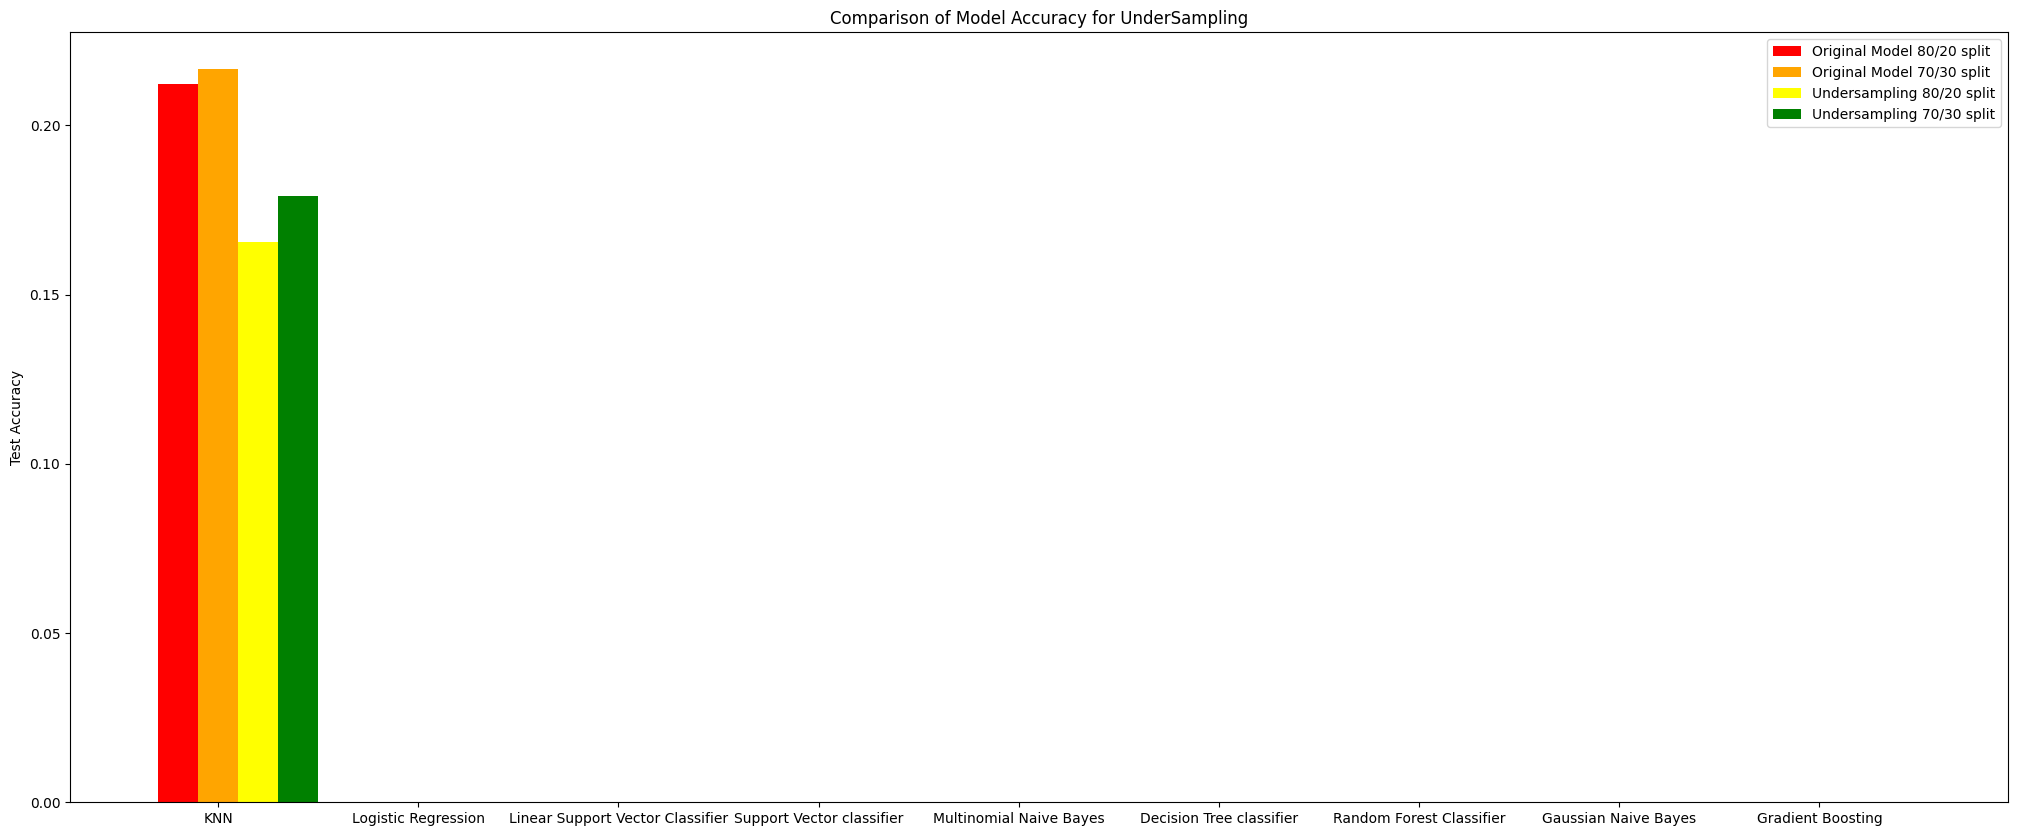

In [117]:
fig, ax = plt.subplots(figsize=(25, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_orig2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_orig3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, model_accuracy_under2['Test accuracy'], color='yellow', width=bar_width, label='Undersampling 80/20 split')
plt.bar(r4, model_accuracy_under3['Test accuracy'], color='green', width=bar_width, label='Undersampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy for UnderSampling')

# Add legend
plt.legend()

# Show plot
plt.show()


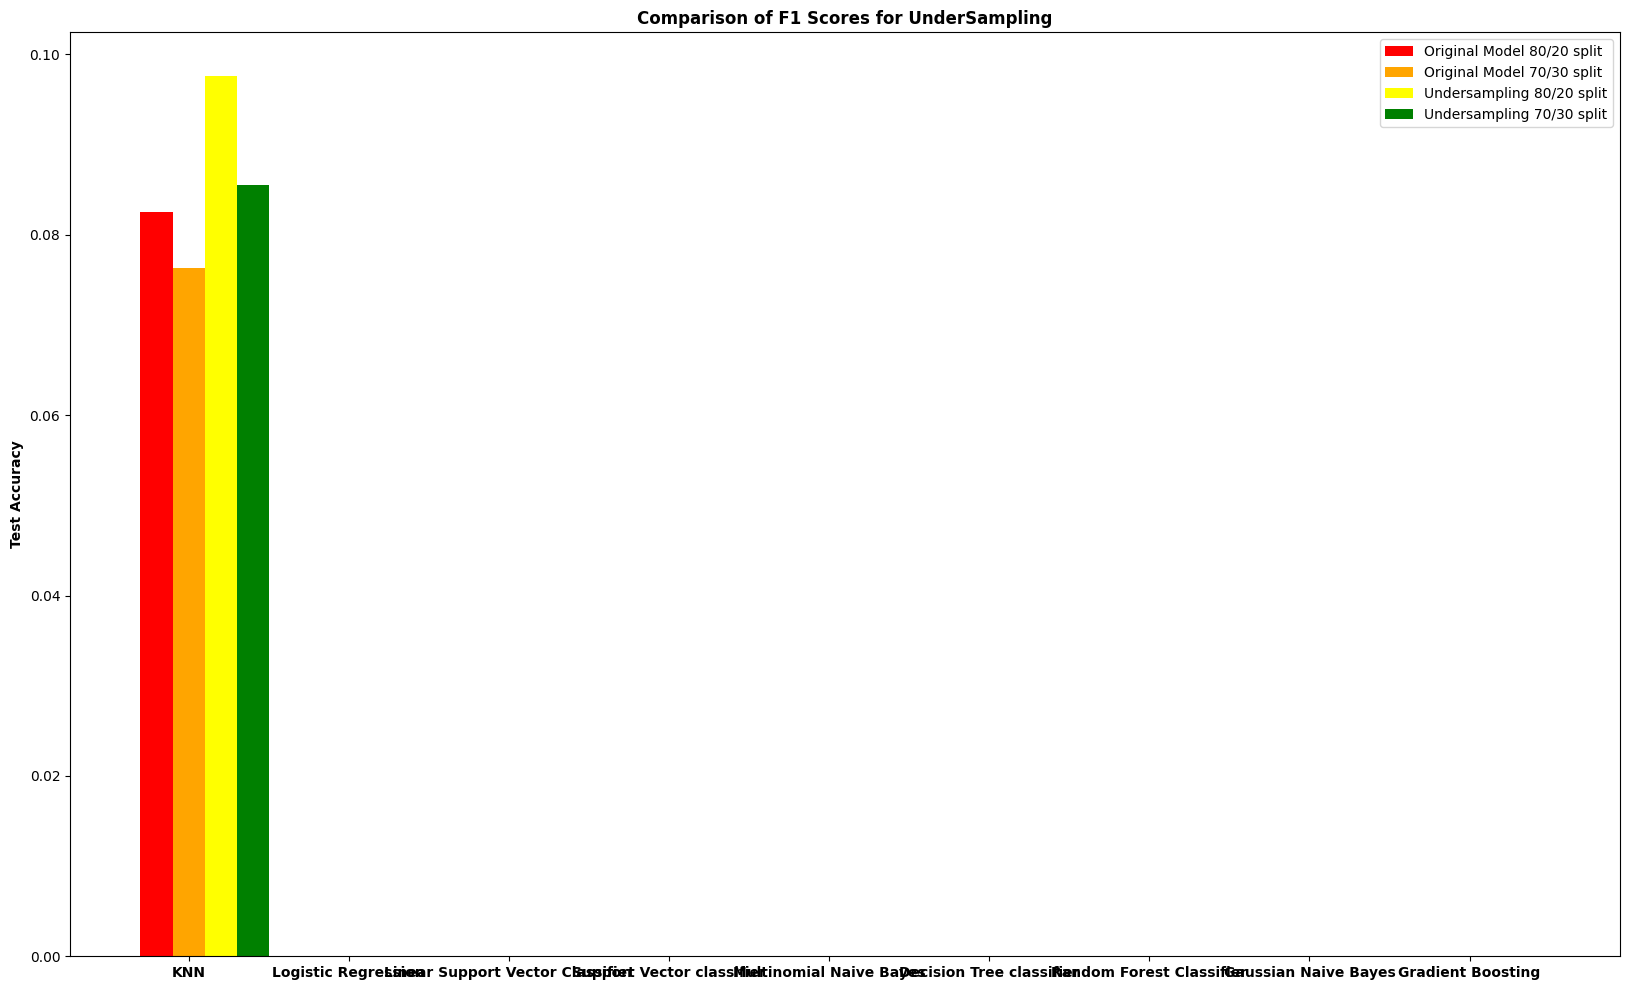

In [118]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2
models = f1_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(f1_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig2['Test F1 Score'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, f1_orig3['Test F1 Score'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, f1_orig_under2['Test F1 Score'], color='yellow', width=bar_width, label='Undersampling 80/20 split')
plt.bar(r4, f1_orig_under3['Test F1 Score'], color='green', width=bar_width, label='Undersampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('Comparison of F1 Scores for UnderSampling',fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()

In [119]:
train_data_over2 = sampling('over', train_data2, 'type', list(train_data2.type.unique()), train_data2.type.value_counts().max())
train_data_over2

,posts,type
5785,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
6284,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
4320,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
356,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",15
1460,"[0.0, 0.10394849988165873, 0.0, 0.0, 0.0, 0.0,...",15
...,...,...
6293,"[0.055775301871779946, 0.0, 0.0, 0.0, 0.0, 0.0...",0
2919,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4554,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4253,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [120]:
print("Random Oversampling")
train_data_over2.type.value_counts()


Random Oversampling


15    1466
8     1466
9     1466
10    1466
3     1466
11    1466
1     1466
13    1466
7     1466
14    1466
2     1466
12    1466
4     1466
6     1466
5     1466
0     1466
Name: type, dtype: int64

In [121]:
X_train_over2, y_train_over2 = get_train(train_data_over2)

In [122]:
model_accuracy_over2, report_over2, f1_over2 = model(X_train_over2, X_test2, y_train_over2, y_test2, target_names_orig)

running Logistic Regression
running Linear Support Vector Classifier
running Random Forest Classifier
running Multinomial Naive Bayes
running KNN
running Decision Tree classifier
running Support Vector classifier
running Gaussian Naive Bayes
running Gradient Boosting


In [123]:
model_accuracy_over2.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,KNN,0.149280
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [124]:
f1_over2.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,KNN,0.096037
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [125]:
train_data_over3 = sampling('over', train_data3, 'type', list(train_data3.type.unique()), train_data3.type.value_counts().max())
train_data_over3

,posts,type
2892,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1394,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
1152,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
851,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0618591506269...",3
2171,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
...,...,...
5229,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
5181,"[0.0, 0.023922073469438036, 0.0, 0.0, 0.0, 0.0...",6
5862,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6
4220,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",6


In [126]:
X_train_over3, y_train_over3 = get_train(train_data_over3)

In [127]:
model_accuracy_over3, report_over3, f1_over3 = model(X_train_over3, X_test3, y_train_over3, y_test3, target_names_orig)

running Logistic Regression
running KNN
running Linear Support Vector Classifier
running Decision Tree classifier
running Gaussian Naive Bayes
running Random Forest Classifier
running Support Vector classifier
running Multinomial Naive Bayes
running Gradient Boosting


In [128]:
model_accuracy_over3.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,KNN,0.149827
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


In [129]:
f1_over3.sort_values(by='Test F1 Score',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test F1 Score
0,KNN,0.087015
1,Logistic Regression,0.000000
2,Linear Support Vector Classifier,0.000000
3,Support Vector classifier,0.000000
4,Multinomial Naive Bayes,0.000000
5,Decision Tree classifier,0.000000
6,Random Forest Classifier,0.000000
7,Gaussian Naive Bayes,0.000000
8,Gradient Boosting,0.000000


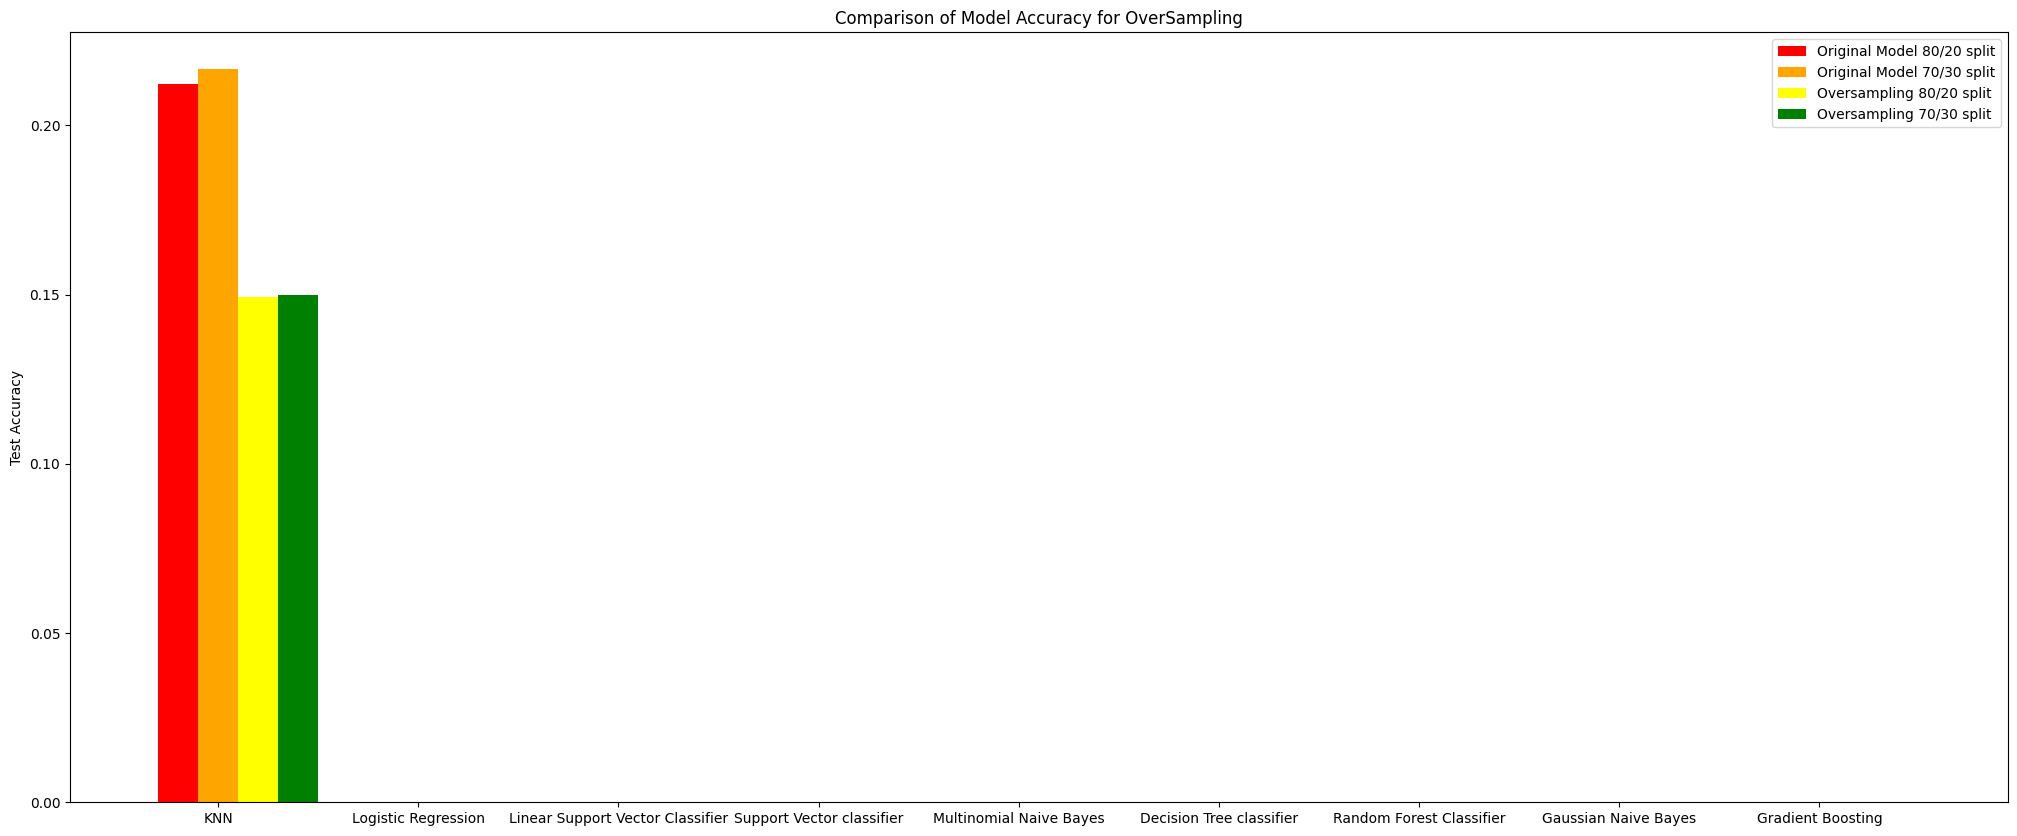

In [130]:
fig, ax = plt.subplots(figsize=(25, 10))
# Set width of each bar
bar_width = 0.2
models = model_accuracy_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(model_accuracy_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, model_accuracy_orig2['Test accuracy'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, model_accuracy_orig3['Test accuracy'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, model_accuracy_over2['Test accuracy'], color='yellow', width=bar_width, label='Oversampling 80/20 split')
plt.bar(r4, model_accuracy_over3['Test accuracy'], color='green', width=bar_width, label='Oversampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add y axis label and title
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracy for OverSampling')

# Add legend
plt.legend()

# Show plot
plt.show()

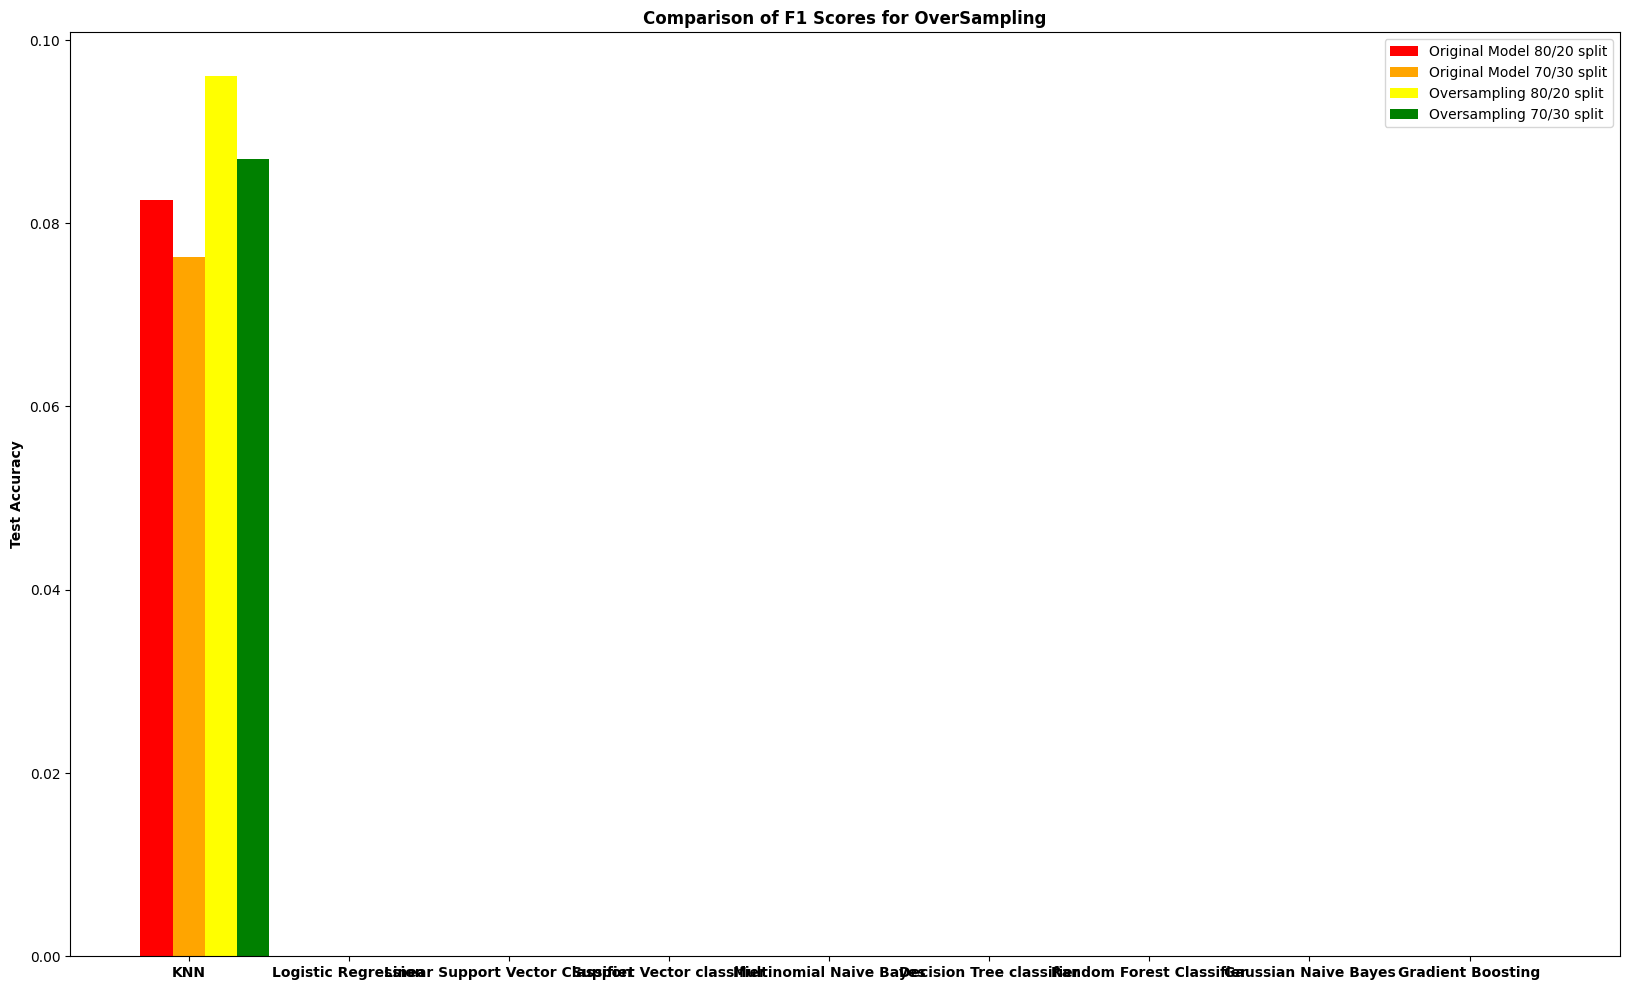

In [131]:
fig, ax = plt.subplots(figsize=(20, 12))
# Set width of each bar
bar_width = 0.2
models = f1_orig2['Models']
# Set position of bars on X axis
r1 = np.arange(len(f1_orig2['Models']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot bars
plt.bar(r1, f1_orig2['Test F1 Score'], color='red', width=bar_width, label='Original Model 80/20 split')
plt.bar(r2, f1_orig3['Test F1 Score'], color='orange', width=bar_width, label='Original Model 70/30 split')
plt.bar(r3, f1_over2['Test F1 Score'], color='yellow', width=bar_width, label='Oversampling 80/20 split')
plt.bar(r4, f1_over3['Test F1 Score'], color='green', width=bar_width, label='Oversampling 70/30 split')

# Add xticks and labels
plt.xticks([r + bar_width for r in range(len(models))], models,fontweight='bold')

# Add y axis label and title
plt.ylabel('Test Accuracy',fontweight='bold')
plt.title('Comparison of F1 Scores for OverSampling',fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()

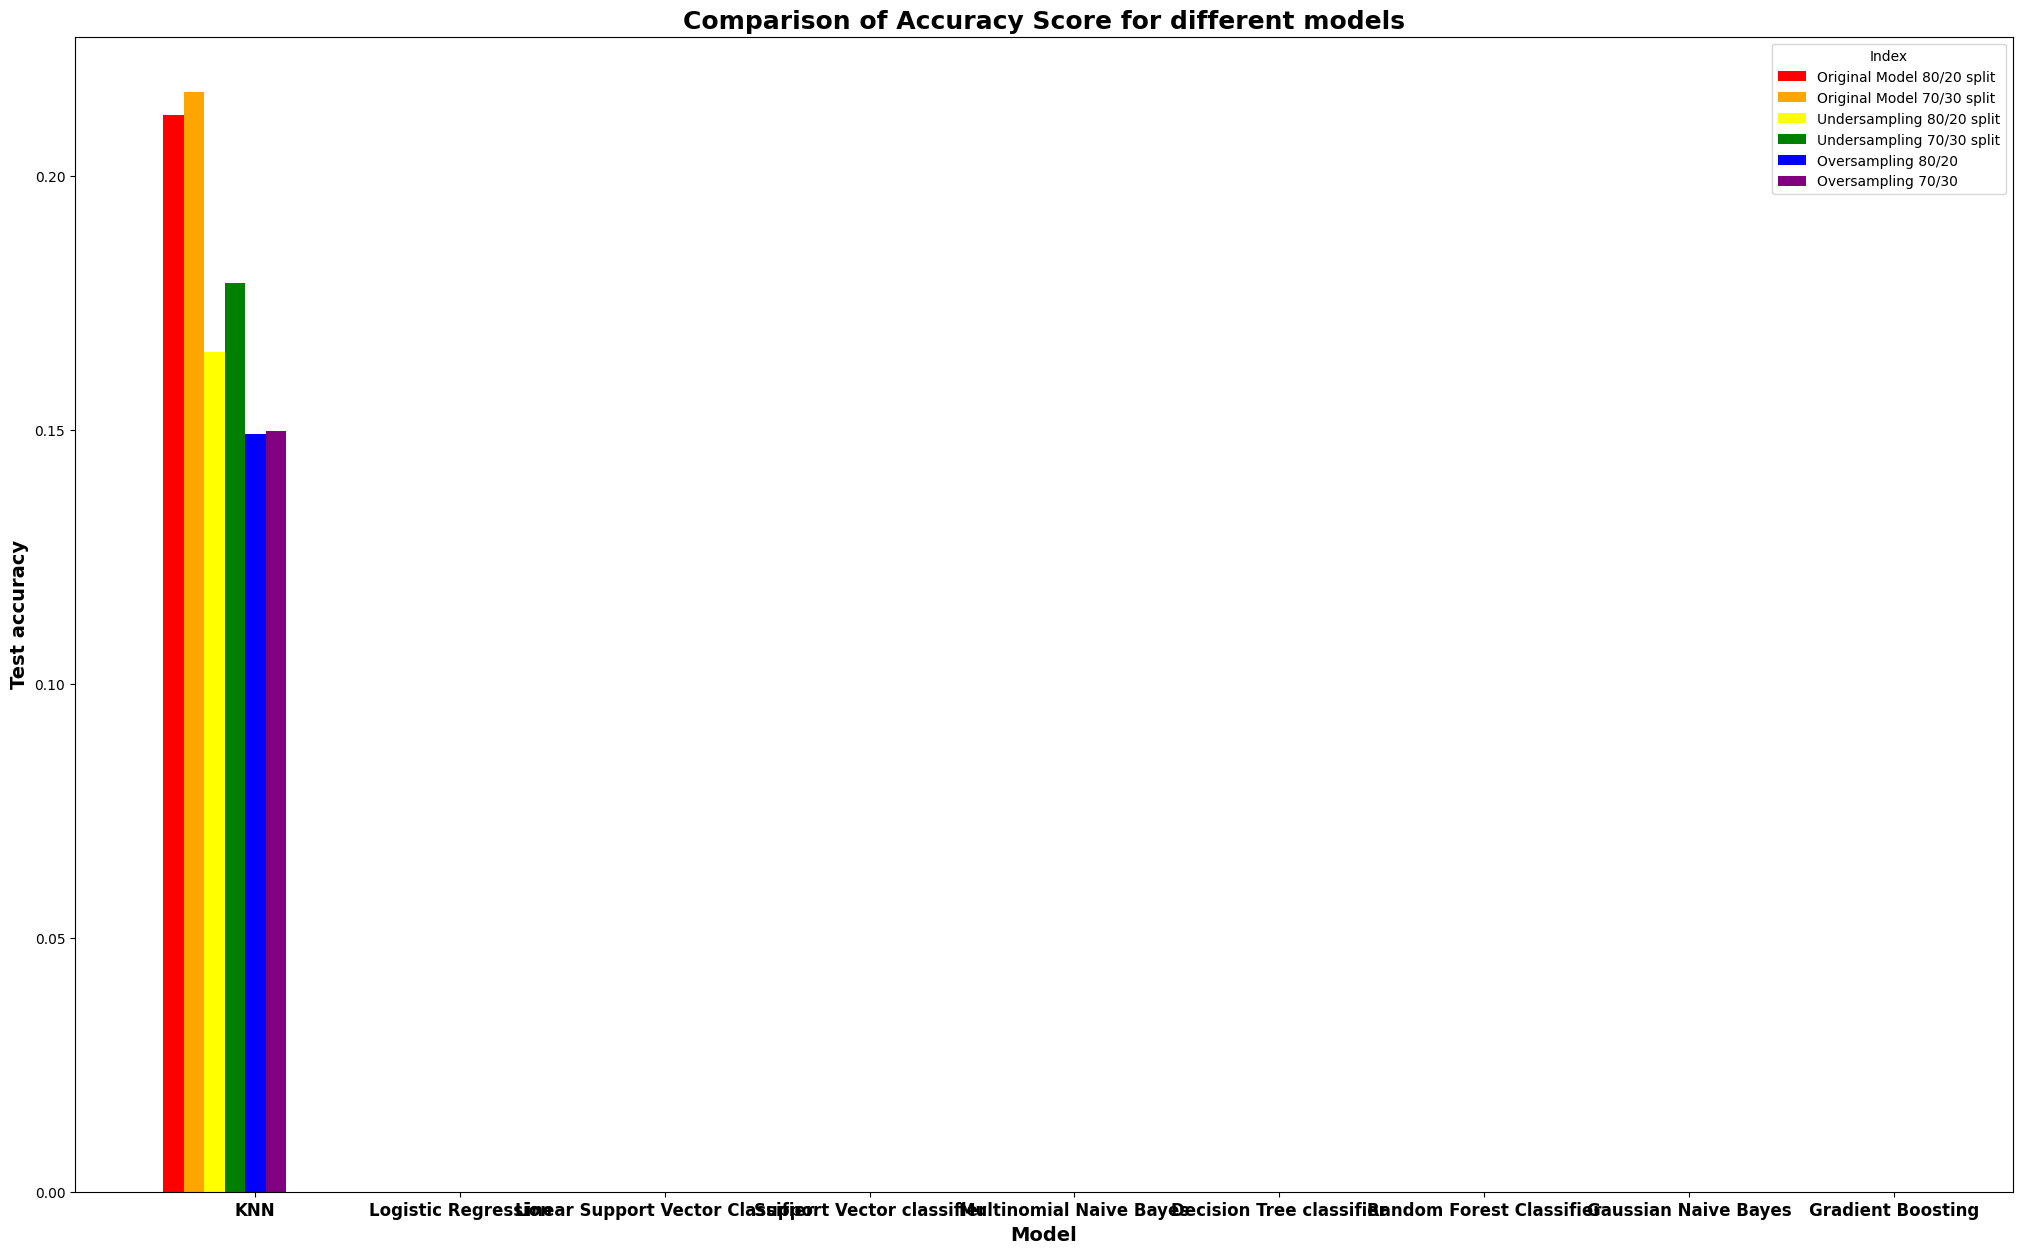

In [132]:
import matplotlib.pyplot as plt

# create a bar plot for test accuracy
fig, ax = plt.subplots(figsize=(25, 15))
width = 0.1
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown']
name = ['Original Model 80/20 split', 'Original Model 70/30 split', 'Undersampling 80/20 split', 'Undersampling 70/30 split','Oversampling 80/20', 'Oversampling 70/30']
accuracies = [model_accuracy_orig2, model_accuracy_orig3, model_accuracy_under2, model_accuracy_under3, model_accuracy_over2, model_accuracy_over3]
for i in range(len(accuracies)):
    ax.bar(x=np.arange(len(accuracies[i]['Models']))+i*width, height=accuracies[i]['Test accuracy'], width=width, color=colors[i], label=f"{name[i]}")
ax.set_ylabel('Test accuracy', fontweight='bold', fontsize=14)
ax.set_xlabel('Model', fontweight='bold', fontsize=14)
ax.set_title('Comparison of Accuracy Score for different models', fontweight='bold', fontsize=18)
ax.set_xticks(np.arange(len(model_accuracy_orig2['Models']))+width*4)
ax.set_xticklabels(model_accuracy_orig2['Models'], fontweight='bold', fontsize=12)
ax.legend(title="Index")
plt.show()

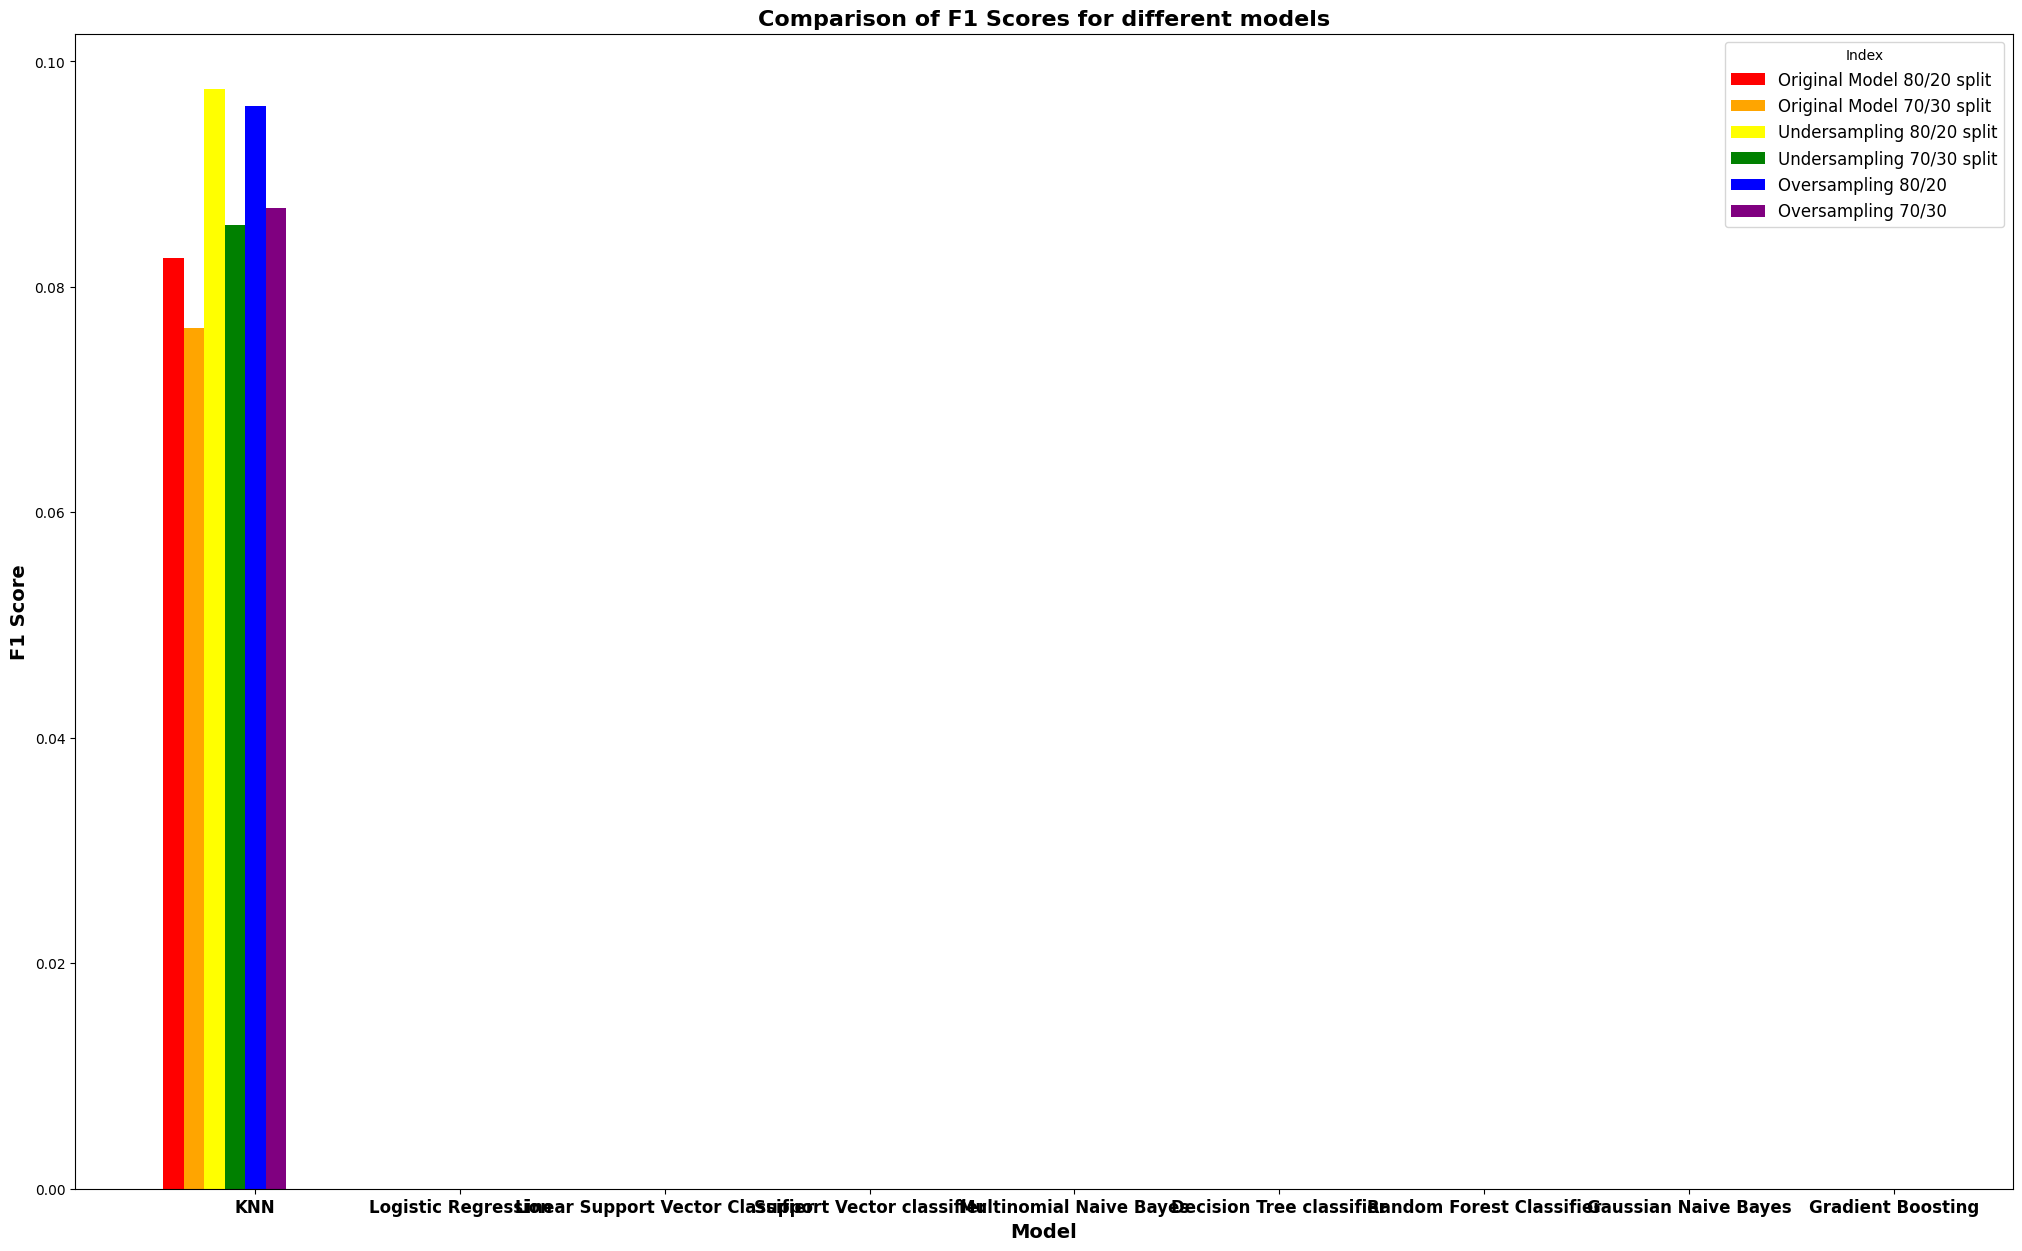

In [133]:
fig, ax = plt.subplots(figsize=(25, 15))
width = 0.1
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'brown']
name = ['Original Model 80/20 split', 'Original Model 70/30 split', 'Undersampling 80/20 split', 'Undersampling 70/30 split','Oversampling 80/20', 'Oversampling 70/30',
        'SMOTE 80/20', 'SMOTE 70/30']
accuracies = [f1_orig2, f1_orig3, f1_orig_under2, f1_orig_under3, f1_over2, f1_over3]
for i in range(len(accuracies)):
    ax.bar(x=np.arange(len(accuracies[i]['Models']))+i*width, height=accuracies[i]['Test F1 Score'], width=width, color=colors[i], label=f"{name[i]}")
ax.set_ylabel('F1 Score', fontweight='bold', fontsize=14)
ax.set_xlabel('Model', fontweight='bold', fontsize=14)
ax.set_title('Comparison of F1 Scores for different models', fontweight='bold', fontsize=16)
ax.set_xticks(np.arange(len(f1_orig2['Models']))+width*4)
ax.set_xticklabels(f1_orig2['Models'], fontweight='bold', fontsize=12)
ax.legend(title="Index", fontsize=12)
plt.show()

In [134]:
X_train, X_test, y_train, y_test = split(df_clean, 0.2)
# Preprocess the input text
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+', ' ', text)
    text = re.sub('[^0-9a-z]', ' ', text)
    text = " ".join([word for word in text.split() if word not in stop_words])
    text = lemmatizer.lemmatize(text)
    return text

# Load the TfidfVectorizer and LabelEncoder used in training
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
vectorizer.fit(df.posts)

target_encoder = LabelEncoder()
target_encoder.fit(df.type)

# Load the pre-trained model
# Load the pre-trained model
model = LinearSVC(C=0.1)
model.fit(X_train, y_train)
def predict_personality(input_text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Transform the input text
    input_text_vectorized = vectorizer.transform([preprocessed_text]).toarray()

    # Predict the personality type
    predicted_label = target_encoder.inverse_transform(model.predict(input_text_vectorized))

    return predicted_label[0]

# Example usage:
input_text = "Your input text here"  # Replace with the text you want to classify
predicted_personality = predict_personality(input_text)
print("Predicted Personality Type:", predicted_personality)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/prawallamshal/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cleaning The Dataset


100%|██████████| 8675/8675 [00:02<00:00, 3375.78it/s]
/Users/prawallamshal/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

/Users/prawallamshal/miniconda3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.



Splitting into train & test
Applying Tfidf Vectorization
Label Encoding the classes
Getting the final train and test
['ENFJ' 'ENFP' 'ENTJ' 'ENTP' 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP'
 'INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP']
Predicted Personality Type: INTJ


In [135]:
model1 = LogisticRegression(max_iter=3000, C=0.5, n_jobs=-1)
model1.fit(X_train_over2, y_train_over2)
def predict_personality_logi(input_text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Transform the input text
    input_text_vectorized = vectorizer.transform([preprocessed_text]).toarray()

    # Predict the personality type
    predicted_label = target_encoder.inverse_transform(model.predict(input_text_vectorized))

    return predicted_label

In [136]:
model2 = MultinomialNB()
model2.fit(X_train_over2, y_train_over2)
def predict_personality_multi(input_text):
    # Preprocess the input text
    preprocessed_text = preprocess_text(input_text)

    # Transform the input text
    input_text_vectorized = vectorizer.transform([preprocessed_text]).toarray()

    # Predict the personality type
    predicted_label = target_encoder.inverse_transform(model.predict(input_text_vectorized))

    return predicted_label

In [138]:
input_text = ["Life's a party!", "I love being the center of attention.", "Let's try something new."]
for i in input_text:
    print("-" * 30)
    print(f"input text: {i}")
    predicted_personality = predict_personality(preprocess_text(i))
    predicted_personality1 = predict_personality_logi(i)

    predicted_personality2 = predict_personality_logi(i)
    print(f"Predicted Personality Type:{predicted_personality} : {predicted_personality1[0]} : {predicted_personality2[0]} " )
print("-" * 30)
    


------------------------------
input text: Life's a party!
Predicted Personality Type:INTP : INTP : INTP 
------------------------------
input text: I love being the center of attention.
Predicted Personality Type:INTJ : INTJ : INTJ 
------------------------------
input text: Let's try something new.
Predicted Personality Type:INTP : INTP : INTP 
------------------------------


In [139]:
mbti_types = [
    # ISTJ (Inspector)
    {
        'type': 'ISTJ',
        'phrases': ["Let's stick to the plan.", "I told you so.", "Efficiency is key."]
    },

    # ISFJ (Protector)
    {
        'type': 'ISFJ',
        'phrases': ["How can I help?", "I appreciate your thoughtfulness.", "I'll take care of it."]
    },

    # INFJ (Counselor)
    {
        'type': 'INFJ',
        'phrases': ["I have a vision for the future.", "I understand how you feel.", "Let's make a difference."]
    },

    # INTJ (Mastermind)
    {
        'type': 'INTJ',
        'phrases': ["I have a strategic plan.", "Innovation is the key to success.", "I see the big picture."]
    },

    # ISTP (Craftsman)
    {
        'type': 'ISTP',
        'phrases': ["I'll figure out how it works.", "Hands-on experience is valuable.", "I enjoy taking risks."]
    },

    # ISFP (Composer)
    {
        'type': 'ISFP',
        'phrases': ["I express myself through art.", "Nature inspires me.", "I value individuality."]
    },

    # INFP (Healer)
    {
        'type': 'INFP',
        'phrases': ["I believe in possibilities.", "Empathy is my strength.", "I seek harmony."]
    },

    # INTP (Architect)
    {
        'type': 'INTP',
        'phrases': ["I love exploring ideas.", "Logic is my guide.", "I enjoy problem-solving."]
    },

    # ESTP (Dynamo)
    {
        'type': 'ESTP',
        'phrases': ["Let's live in the moment.", "I thrive in action.", "Rules are made to be broken."]
    },

    # ESFP (Performer)
    {
        'type': 'ESFP',
        'phrases': ["Life is a stage.", "I love to entertain.", "I'm spontaneous."]
    },

    # ENFP (Champion)
    {
        'type': 'ENFP',
        'phrases': ["I'm full of possibilities.", "I inspire others.", "Let's make it fun!"]
    },

    # ENTP (Visionary)
    {
        'type': 'ENTP',
        'phrases': ["I love brainstorming.", "Debate sharpens my mind.", "I'm always up for a challenge."]
    },

    # ESTJ (Supervisor)
    {
        'type': 'ESTJ',
        'phrases': ["I take charge.", "Order is important.", "I value loyalty."]
    },

    # ESFJ (Provider)
    {
        'type': 'ESFJ',
        'phrases': ["How can I support you?", "I enjoy organizing events.", "I'm a people person."]
    },

    # ENFJ (Teacher)
    {
        'type': 'ENFJ',
        'phrases': ["I inspire positive change.", "I care about others' feelings.", "Let's work together."]
    },

    # ENTJ (Commander)
    {
        'type': 'ENTJ',
        'phrases': ["I'm a natural leader.", "Efficiency is crucial.", "I see the bigger picture."]
    },
]

for mbti_type_info in mbti_types:
    mbti_type = mbti_type_info['type']
    mbti_type_phrases = mbti_type_info['phrases']

    print(f"MBTI Type: {mbti_type}")
    for i, phrase in enumerate(mbti_type_phrases, start=1):
        predicted_personality = predict_personality(phrase)
        predicted_personality1 = predict_personality_logi(link)
        predicted_personality2 = predict_personality_multi(link)
        print(f"  {phrase} : {predicted_personality} : {predicted_personality1[0]} : {predicted_personality2[0]}")

    print("-" * 30)

MBTI Type: ISTJ
  Let's stick to the plan. : INTP : INTP : INTP
  I told you so. : INTP : INTP : INTP
  Efficiency is key. : INFJ : INTP : INTP
------------------------------
MBTI Type: ISFJ
  How can I help? : INFJ : INTP : INTP
  I appreciate your thoughtfulness. : INTP : INTP : INTP
  I'll take care of it. : INTP : INTP : INTP
------------------------------
MBTI Type: INFJ
  I have a vision for the future. : INFJ : INTP : INTP
  I understand how you feel. : INFP : INTP : INTP
  Let's make a difference. : INTJ : INTP : INTP
------------------------------
MBTI Type: INTJ
  I have a strategic plan. : INTP : INTP : INTP
  Innovation is the key to success. : INFJ : INTP : INTP
  I see the big picture. : INTP : INTP : INTP
------------------------------
MBTI Type: ISTP
  I'll figure out how it works. : INTP : INTP : INTP
  Hands-on experience is valuable. : INTP : INTP : INTP
  I enjoy taking risks. : INTJ : INTP : INTP
------------------------------
MBTI Type: ISFP
  I express myself thr

In [150]:
import requests
from bs4 import BeautifulSoup

# Function to scrape the content from a website
def scrape_web_content(url):
    try:
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            # Adjust the selectors based on the structure of the website
            web_content = soup.get_text()
            return web_content
        else:
            print(f"Failed to fetch content. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error: {e}")


if __name__ == "__main__":
    # URL of the web page
    web_url = ["https://www.facebook.com/manish.907", "https://youtubetranscript.com/?v=hNWBJyFRdPc",
               "https://youtubetranscript.com/?v=KubykaA45RU", "https://www.facebook.com/prawallamshal", "https://www.facebook.com/psiddhant"]
    person_det = ["Manish", "Baibhav", "Bigyat", "Prawal", "Siddhant"]

    # Create a dictionary to store the mapping between names and links
    link_person_mapping = dict(zip(web_url, person_det))

    # Scrape web content
    web_content = scrape_web_content(web_url)
    print(f"  phrase : {predicted_personality})")

    for link in web_url:
        predicted_personality = predict_personality(preprocess_text(link))

        # Retrieve the corresponding name from the dictionary
        person_name = link_person_mapping.get(link, "Unknown")

        print(f"Link : {link}")
        print(f"  {person_name} : {predicted_personality} ")


Error: No connection adapters were found for "['https://www.facebook.com/manish.907', 'https://youtubetranscript.com/?v=hNWBJyFRdPc', 'https://youtubetranscript.com/?v=KubykaA45RU', 'https://www.facebook.com/prawallamshal', 'https://www.facebook.com/psiddhant']"
  phrase : INTP)
Link : https://www.facebook.com/manish.907
  Manish : INTP 
Link : https://youtubetranscript.com/?v=hNWBJyFRdPc
  Baibhav : INTP 
Link : https://youtubetranscript.com/?v=KubykaA45RU
  Bigyat : INTP 
Link : https://www.facebook.com/prawallamshal
  Prawal : INTP 
Link : https://www.facebook.com/psiddhant
  Siddhant : INTP 


In [143]:

if __name__ == "__main__":
    # Dictionary to store person names and their corresponding links
    person_links = {"Person1": "https://istpdigital.com/istp-blogs",
                    "Person2": "https://youtubetranscript.com/?v=hNWBJyFRdPc",
                    "Person3": "https://youtubetranscript.com/?v=KubykaA45RU"}

    # Iterate through the dictionary
    for person, link in person_links.items():
        # Scrape web content
        web_content = scrape_web_content(link)
        
        # Predict personality using different methods
        predicted_personality = predict_personality(web_content)
        predicted_personality1 = predict_personality_logi(link)
        predicted_personality2 = predict_personality_multi(link)
        
        # Print results
        print(f"Person: {person}")
        print(f"  Personality Prediction: {predicted_personality}")
        print(f"  Personality Prediction (Logistic Regression): {predicted_personality1[0]}")
        print(f"  Personality Prediction (Multi-class Classifier): {predicted_personality2[0]}")
        print(f"  Link: {link}\n")


Failed to fetch content. Status code: 406


AttributeError: 'NoneType' object has no attribute 'lower'